3. Importation des bibliothèques et lectures des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/sales_data.csv', encoding='ISO-8859-1')

Afficher les 5 premières lignes

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


4. Opérations et nettoyage

4.a Opérations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
data.shape

(2823, 25)

In [ ]:
data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
data.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


4.b Nettoyage

In [ ]:
data['STATE'] = data['STATE'].fillna('Unknown')
data['POSTALCODE'] = data['POSTALCODE'].fillna('Missing')
data['TERRITORY'] = data['TERRITORY'].fillna('Unknown')
data['ADDRESSLINE2'] = data['ADDRESSLINE2'].fillna('Unknown')

Ce nettoyage sert à traiter les valeurs manquantes dans certaines colonnes du jeu de données data. Les champs **STATE**, **TERRITORY** et **ADDRESSLINE2** sont complétés par "**Unknown**" lorsque l'information est absente, tandis que les codes postaux manquants (**POSTALCODE**) sont remplacés par "**Missing"**. Cela permet de garder toutes les lignes du jeu de données tout en assurant sa cohérence pour les analyses futures

In [ ]:
data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",Unknown,Madrid,Unknown,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,Unknown,Oulu,Unknown,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",Unknown,Madrid,Unknown,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,Unknown,Toulouse,Unknown,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,Unknown,Boston,MA,51003,USA,Unknown,Yoshido,Juri,Medium


5. Compréhension des caractéristiques

In [ ]:
moyenne_sales = np.mean(data['SALES'])
moyenne_sales

np.float64(3553.889071909316)

# Colonnes numériques (SALES), (PRICEEACH) et (QUANTITYORDERED)

In [ ]:
mediane_sales = data['SALES'].median()
mediane_sales

3184.8

In [ ]:
ecart = np.std(data['SALES'])
ecart

1841.538852065539

In [ ]:
price_moyenne = np.mean(data['PRICEEACH'])
price_moyenne

np.float64(83.65854410201914)

In [ ]:
price_mediane = data['PRICEEACH'].median()
price_mediane

95.7

In [ ]:
price_ecart = np.std(data['PRICEEACH'])
price_ecart

20.170703013238615

In [ ]:
quantite_moyenne = np.mean(data['QUANTITYORDERED'])
quantite_moyenne

np.float64(35.09280906836698)

In [ ]:
quantite_mediane = data['QUANTITYORDERED'].median()
quantite_mediane

35.0

In [ ]:
quantite_ecart = np.std(data['QUANTITYORDERED'])
quantite_ecart

9.739717213588346

Concernant les histogrammes nous avons pris que trois(3) exemples pour plus de compréhension.

1 .Histogramme de distributions des ventes

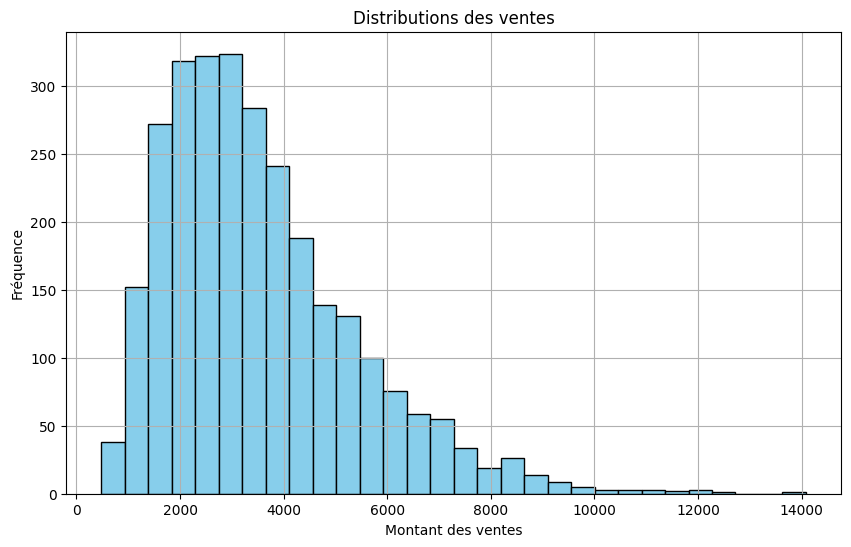

In [ ]:
plt.figure(figsize=(10,6))
data['SALES'].hist(bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title("Distributions des ventes")
plt.xlabel("Montant des ventes")
plt.ylabel("Fréquence")
plt.show()


**Interpétation:**
La majorité des ventes se situent entre 2 000 et 4 000 unités monétaires, avec un pic de fréquence autour de 2 500. Cela signifie que ces montants sont les plus courants. La distribution est asymétrique à droite (ou étalée vers la droite), indiquant que certaines ventes exceptionnelles atteignent des montants beaucoup plus élevés (jusqu'à plus de 13 000), mais ces cas sont rares. Ce type de distribution est typique lorsqu’il existe quelques transactions très importantes au sein d’un grand nombre de ventes plus modestes.

2 .Histogramme de distribution des prix unitaire

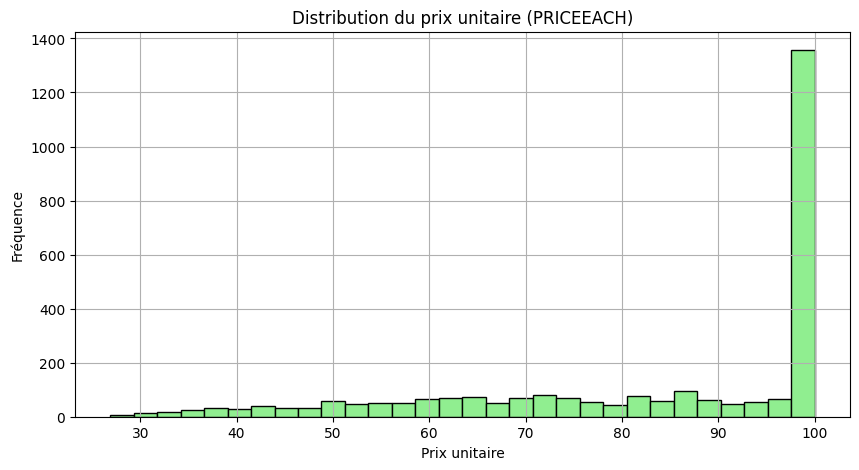

In [ ]:
plt.figure(figsize=(10, 5))
data['PRICEEACH'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution du prix unitaire (PRICEEACH)')
plt.xlabel('Prix unitaire')
plt.ylabel('Fréquence')
plt.show()

***Interprétation: ***
La grande majorité des produits sont vendus à un prix unitaire proche de 100, comme le montre le pic très élevé à l’extrémité droite du graphique. Cela indique qu’un grand nombre d’articles ont un prix fixe ou très similaire, probablement autour de 99 ou 100. En revanche, les autres prix (entre 25 et 95) sont beaucoup moins fréquents et répartis de manière plus homogène.
Cette distribution très asymétrique suggère une stratégie de tarification standardisée pour la majorité des produits, avec seulement quelques articles proposés à des prix différents.

3 .Histogramme de distribution de la quantité commandé

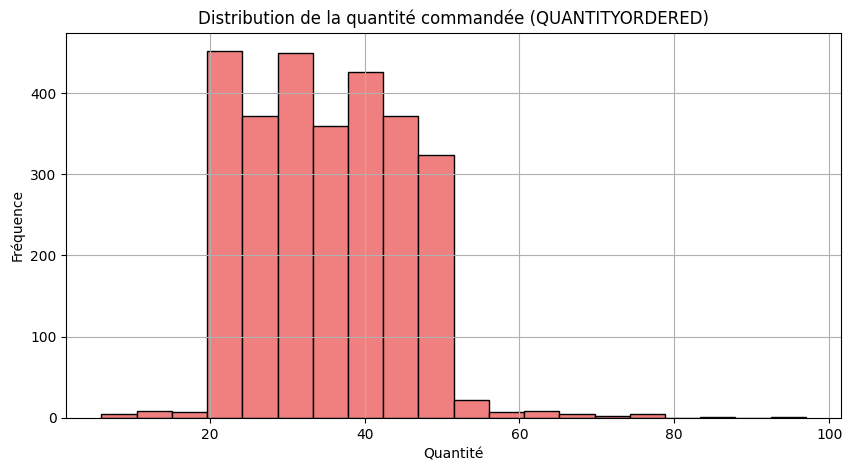

In [ ]:
plt.figure(figsize=(10, 5))
data['QUANTITYORDERED'].hist(bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution de la quantité commandée (QUANTITYORDERED)')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
plt.show()

***Interprétation : ***
La majorité des commandes se situent entre 20 et 50 unités, avec des pics de fréquence autour de 20, 30 et 40 unités. Cela signifie que les clients commandent généralement des quantités modérées. Très peu de commandes dépassent les 60 unités, ce qui indique que les grosses commandes sont rares. La distribution est globalement concentrée et montre une tendance vers des commandes standardisées ou fréquentes dans un certain intervalle, probablement lié à des besoins moyens ou des conditionnements habituels.

Colonnes catégoriques (STATUS), (DEALSIZE)
Pour ces deux colonnes nous avons pu utiliser des diagrammes sectoriels.

1. Diagramme Sectoriel des STATUS

In [ ]:
data['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [ ]:
data['STATUS'].value_counts()

,count
STATUS,
Shipped,2617
Cancelled,60
Resolved,47
On Hold,44
In Process,41
Disputed,14


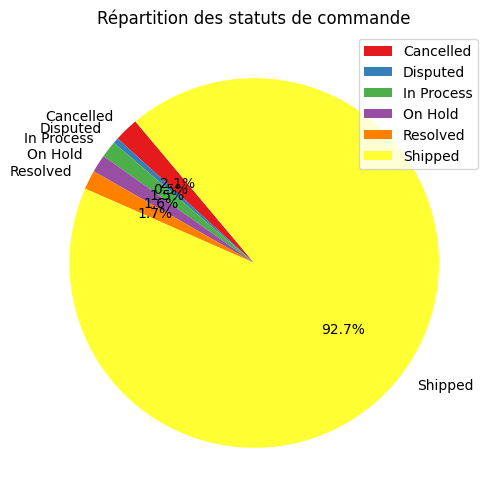

In [ ]:
# Comptage des statuts de commande
status_counts = data['STATUS'].value_counts().sort_index()

# Création du diagramme en camembert
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts.values,             # Nombres de commandes par statut
    labels=status_counts.index,       # Libellés (noms des statuts)
    autopct='%1.1f%%',                # Affichage des pourcentages
    startangle=130,                   # Angle de rotation
    colors=plt.cm.Set1.colors[:len(status_counts)],  # Palette similaire à Seaborn 'Set1'

)

plt.title("Répartition des statuts de commande")
plt.legend()
plt.show()

**Interprétaion :**
Le graphique montre que la grande majorité des commandes, soit 92,7 %, ont été expédiées, ce qui reflète une gestion efficace du processus de traitement des commandes. Les autres statuts, tels que "Résolues", "En attente", "En cours", "Contestées" et "Annulées", représentent chacun une part très faible, inférieure à 2 %. Cela indique que les incidents ou retards sont rares et bien maîtrisés. Ainsi, le système semble fonctionner de manière satisfaisante, avec un très bon taux de livraison.

2. Diagramme Sectoriel de DEALSIZE

In [ ]:
data['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [ ]:
data['DEALSIZE'].value_counts()

,count
DEALSIZE,
Medium,1384
Small,1282
Large,157


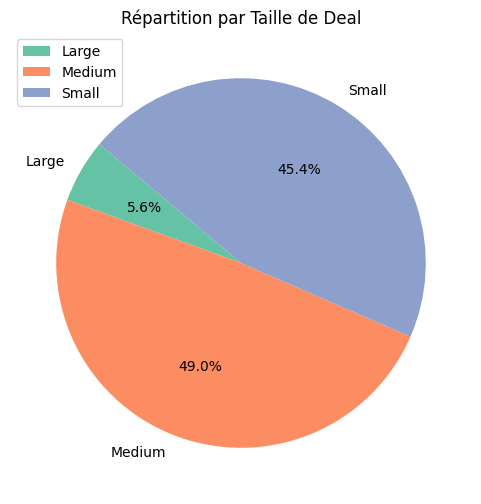

In [ ]:
# Comptage des tailles de deals
deal_counts = data['DEALSIZE'].value_counts().sort_index()

# Création du graphique en camembert
plt.figure(figsize=(6, 6))
plt.pie(
    deal_counts.values,
    labels=deal_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],

)

plt.title("Répartition par Taille de Deal")
plt.legend()
plt.show()

**Interprétation :**
Le graphique montre la répartition des deals selon leur taille. On observe que la majorité des transactions sont de taille **moyenne** (49,0 %), suivies de près par les petits **deals** (45,4 %). Les **gros deals** ne représentent que 5,6 % de l’ensemble. Cela indique que l’activité commerciale est principalement portée par des transactions de taille modérée à petite, avec peu de grands contrats. Ce profil peut refléter une stratégie axée sur la régularité des ventes plutôt que sur quelques gros projets.

1. Graphique d'évolution des commandes par pays

In [ ]:
# Assurez-vous que ORDERDATE est en datetime
data["ORDERDATE"] = pd.to_datetime(data["ORDERDATE"])

<ipython-input-29-2d8d974a8885>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [pd.Grouper(key="ORDERDATE", freq="M"), "COUNTRY"]


<Figure size 1400x600 with 0 Axes>

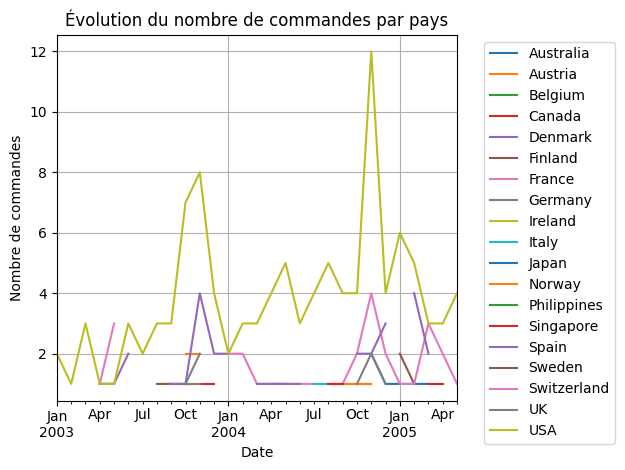

In [ ]:
# Créer une nouvelle colonne 'ORDER_ID' unique par commande
# et grouper par mois et pays
monthly_order_count_country = data.drop_duplicates(subset=["ORDERNUMBER"]).groupby(
    [pd.Grouper(key="ORDERDATE", freq="M"), "COUNTRY"]
)["ORDERNUMBER"].count().unstack()

# Tracer le graphique
plt.figure(figsize=(14, 6))
monthly_order_count_country.plot()
plt.title("Évolution du nombre de commandes par pays")
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Le graphique montre l’évolution du nombre de commandes passées par pays entre janvier 2003 et mai 2005. On observe que les États-Unis (USA), représentés par la courbe **jaune**, dominent largement en termes de volume de commandes, avec plusieurs pics notables, dont un sommet en fin 2004 avec **12 commandes**. Les autres pays ont un volume de commandes beaucoup plus faible et irrégulier, souvent inférieur à 4 commandes par période. La France et l'Allemagne semblent avoir une activité modérée mais relativement constante. Globalement, le graphique met en évidence une forte disparité entre les pays, avec une concentration marquée des commandes en provenance des États-Unis.

2. Graphique d'évolution des commandes par Catégorie de produit

<ipython-input-30-d7986d276e16>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [pd.Grouper(key="ORDERDATE", freq="M"), "PRODUCTLINE"]


<Figure size 1400x600 with 0 Axes>

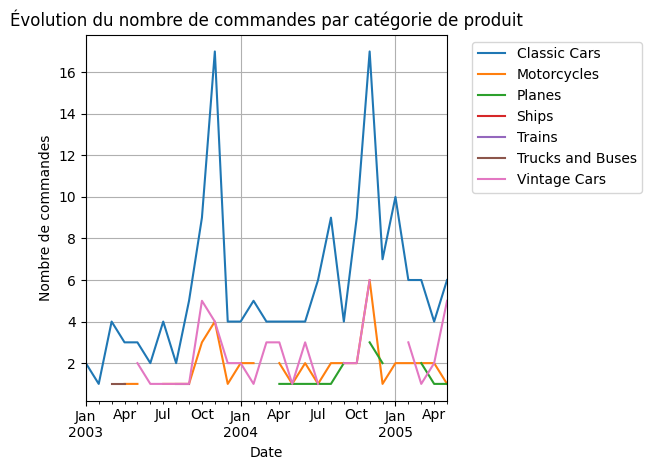

In [ ]:
# Grouper par mois et catégorie de produit (commandes uniques)
monthly_order_count_category = data.drop_duplicates(subset=["ORDERNUMBER"]).groupby(
    [pd.Grouper(key="ORDERDATE", freq="M"), "PRODUCTLINE"]
)["ORDERNUMBER"].count().unstack()

# Tracer le graphique
plt.figure(figsize=(14, 6))
monthly_order_count_category.plot()
plt.title("Évolution du nombre de commandes par catégorie de produit")
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Le graphique illustre l’évolution du nombre de commandes par catégorie de produit entre janvier 2003 et mai 2005. On remarque que la catégorie **"Classic Cars"** (voitures classiques) domine largement le marché, avec plusieurs pics importants atteignant jusqu'à **17 commandes**, notamment en fin 2003 et début 2005. Les autres catégories comme **"Vintage Cars"**, **"Motorcycles"** et **"Planes"** enregistrent des volumes de commandes bien plus faibles et stables, souvent autour de **1 à 3 commandes.** Cette tendance suggère que les voitures classiques sont de loin les produits les plus prisés, représentant la majorité des ventes, tandis que les autres catégories jouent un rôle plus marginal dans les commandes.

3. Nombre de vente par Mois

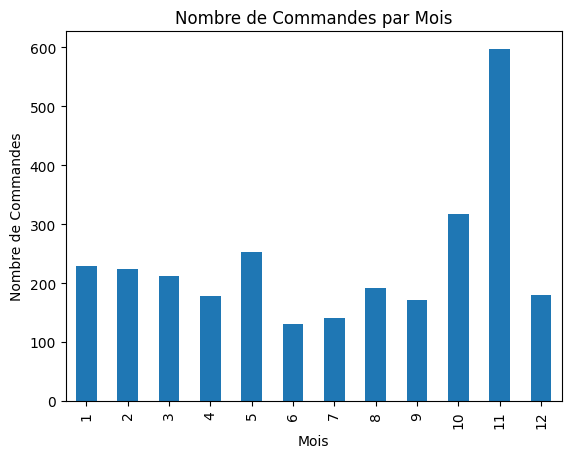

In [ ]:
# vente par mois
data['MONTH_ID'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de Commandes par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Commandes")
plt.show()

Le graphique montre la répartition du nombre de commandes par mois. On observe que le mois de novembre (mois 11) enregistre un pic exceptionnel avec près de **600 commandes**, ce qui en fait la période la plus active de l’année. D'autres mois comme mai (mois 5) et octobre (mois 10) présentent également une activité notable, tandis que les mois d’été, notamment juin (mois 6) et juillet (mois 7), enregistrent les plus faibles volumes de commandes, avec moins de **150**commande. Globalement, la fin d’année semble être la période la plus dynamique pour les commandes, possiblement en raison de promotions, fêtes ou bouclages budgétaires.

4. Top 10 des clients par vente totale

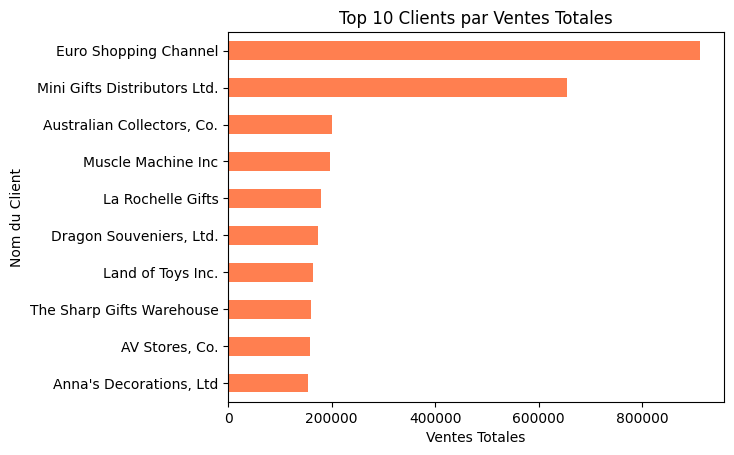

In [ ]:
top_clients = data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)

top_clients.plot(kind='barh', color='coral')
plt.title("Top 10 Clients par Ventes Totales")
plt.xlabel("Ventes Totales")
plt.ylabel("Nom du Client")
plt.gca().invert_yaxis()
plt.show()

Le graphique met en évidence les dix clients les plus importants en termes de ventes totales. Il montre que ***Euro Shopping Channel*** est de loin le client le plus rentable, représentant à lui seul une part très importante du chiffre d’affaires, suivi par ***Mini Gifts Distributors Ltd***. Les autres clients, bien que significatifs, génèrent des ventes nettement inférieures. Cette forte concentration des revenus sur un nombre très limité de clients, en particulier **les deux premiers**, souligne une dépendance commerciale qui pourrait représenter un risque pour l’entreprise en cas de perte de l’un d’eux. Il serait donc stratégique de diversifier la base de clients pour renforcer la stabilité financière.

Scatterplot des ventes en fonction de la date de commande

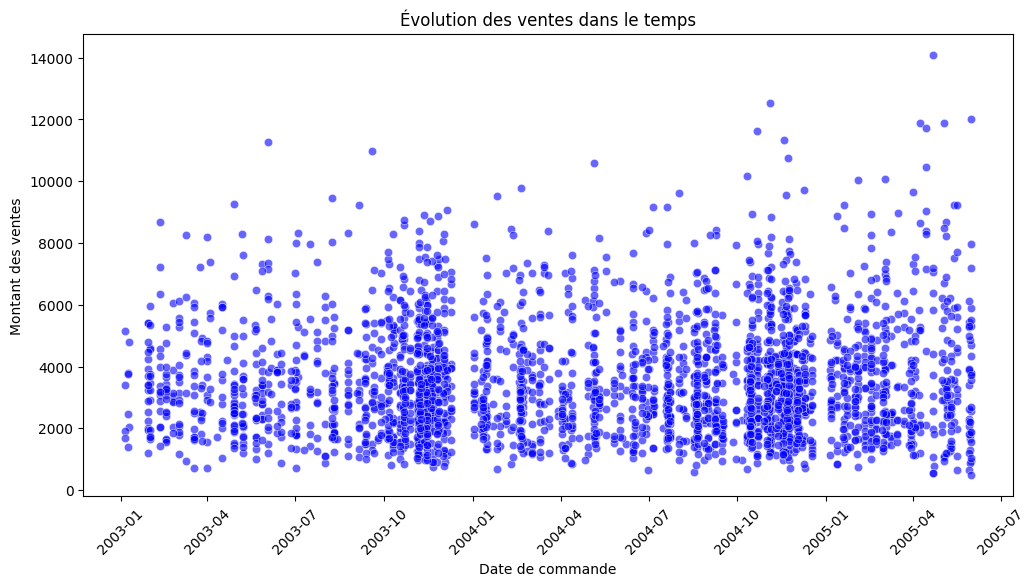

In [ ]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Tracer le scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ORDERDATE', y='SALES', data=data, color='blue', alpha=0.6)
plt.title("Évolution des ventes dans le temps")
plt.xlabel("Date de commande")
plt.ylabel("Montant des ventes")
plt.xticks(rotation=45)
plt.show()

Barplot des ventes par pays

<ipython-input-10-496c886d27f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='SALES', data=data, palette='viridis')


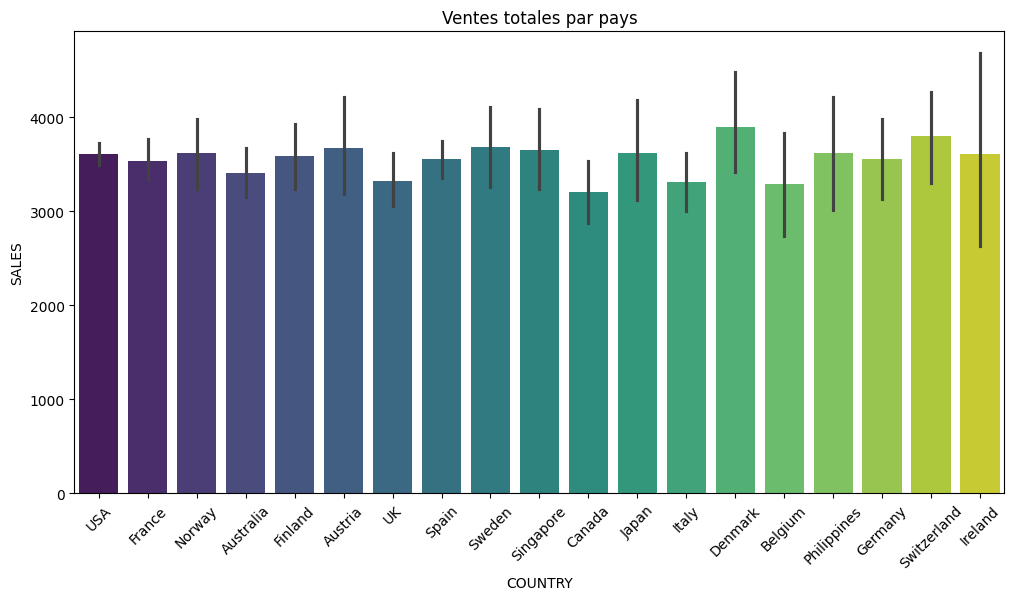

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x='COUNTRY', y='SALES', data=data, palette='viridis')
plt.title("Ventes totales par pays")
plt.xlabel("COUNTRY")
plt.ylabel("SALES")
plt.show()

Diagramme sectorielle des catégories de produits

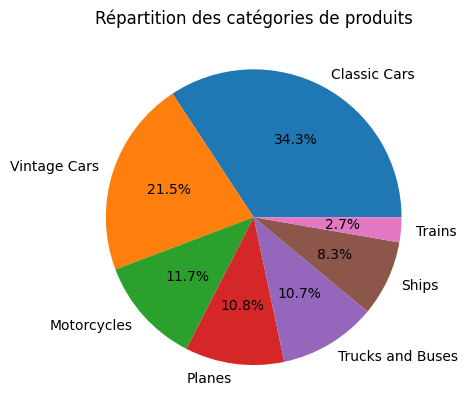

In [ ]:
plt.pie(data['PRODUCTLINE'].value_counts(), labels=data['PRODUCTLINE'].value_counts().index, autopct='%1.1f%%')
plt.title("Répartition des catégories de produits")
plt.show()

Diagramme en barre des Produits les plus vendus

<ipython-input-15-2a476649ec9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


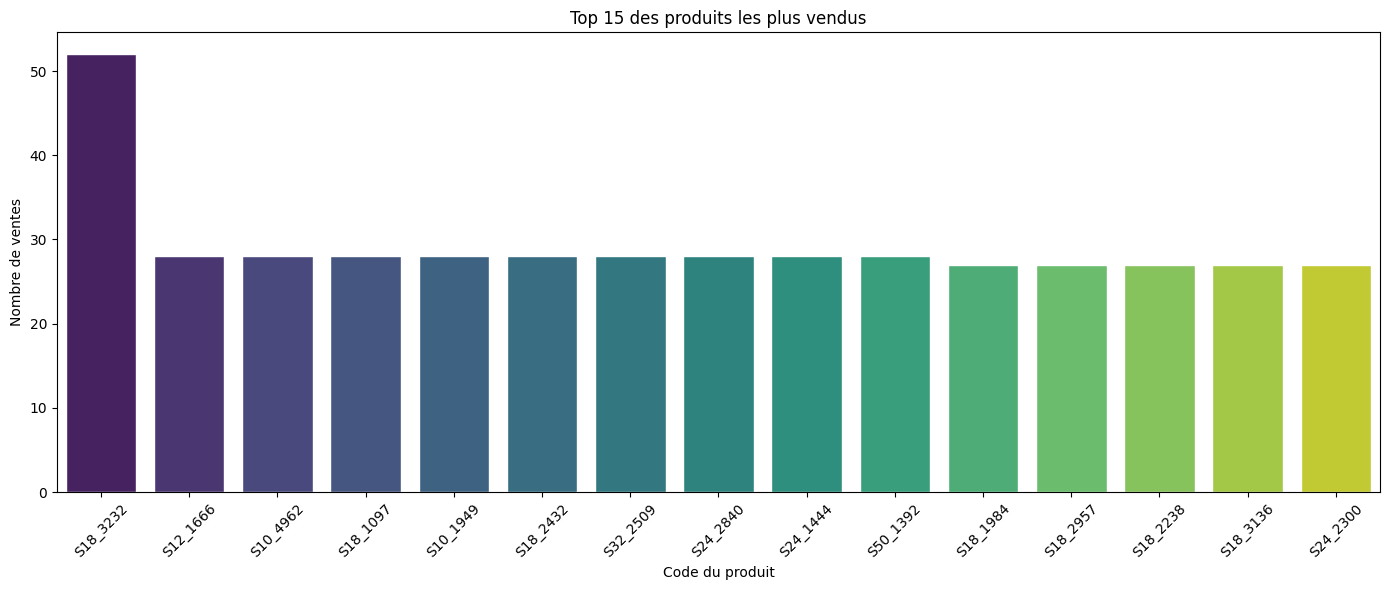

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x=data['PRODUCTCODE'].value_counts().index[:15],  # Top 15 produits
    y=data['PRODUCTCODE'].value_counts().values[:15],
    palette='viridis',
    edgecolor='white'
)

plt.xticks(rotation=45)
plt.title('Top 15 des produits les plus vendus')
plt.xlabel('Code du produit')
plt.ylabel('Nombre de ventes')
plt.tight_layout()
plt.show()

6. Matrice de correlation

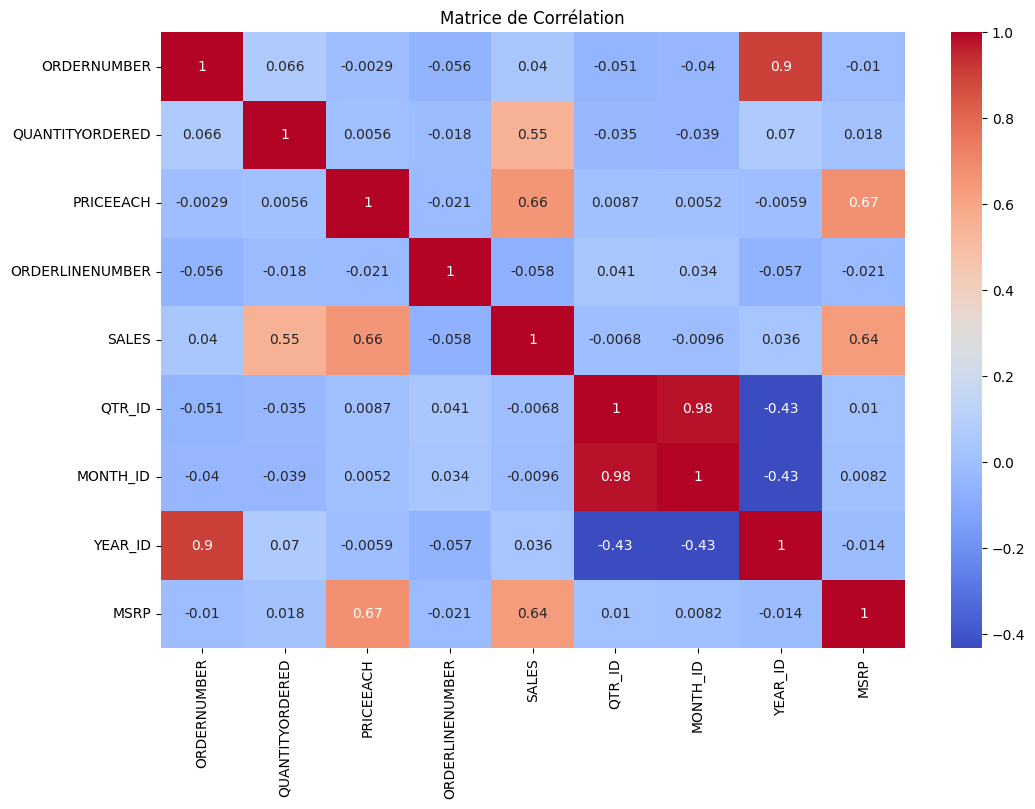

In [ ]:
# Corrélation entre les variables numériques
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

La matrice de corrélation met en évidence les relations entre différentes variables liées aux commandes. On observe que la *variable **"SALES"** (ventes)* est fortement corrélée à *"PRICEEACH" (0.66)' , **"MSRP" (0.64)* et *"**QUANTITYORDERED**" (0.55), ce qui est logique : plus un produit est cher et vendu en grande quantité, plus le montant total des ventes augmente. Une forte corrélation (0.90) est également présente entre **"ORDERNUMBER"* et *"YEAR\_ID", ce qui suggère que les numéros de commande augmentent avec le temps. De plus, les variables **"QTR\_ID"* et *"MONTH\_ID"* sont quasiment parfaitement corrélées (0.98), ce qui reflète leur lien logique (chaque mois appartient à un trimestre). À l’inverse, la plupart des autres variables montrent des corrélations très faibles, ce qui indique qu'elles évoluent de manière relativement indépendante les unes des autres.